In [1]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import sys  
sys.path.insert(0, '/home/HPC/camontan/turchetti_paper/')

from clustering_scripts import *

In [2]:
f = h5py.File(f"/home/HPC/camontan/turchetti_paper/output/focused_scan/partial_data.h5", 'r')

In [3]:
f.keys()

<KeysViewHDF5 ['10', '100', '1000', '10000', '100000', '1000000', '10000000', '13', '138', '1389', '13894', '138949', '1389495', '13894954', '19', '193', '1930', '19306', '193069', '1930697', '19306977', '26', '268', '2682', '26826', '268269', '2682695', '26826957', '37', '372', '3727', '37275', '372759', '3727593', '51', '517', '5179', '51794', '517947', '5179474', '71', '719', '7196', '71968', '719685', '7196856', 'initial']>

In [4]:
f['1000000'].keys()

<KeysViewHDF5 ['lyapunov_b_x', 'lyapunov_x']>

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 10))

axs[0].imshow(f['1000000']['lyapunov_x'][:].reshape(200, 200), origin='lower')
axs[1].imshow(f['1000000']['lyapunov_b_x'][:].reshape(200, 200), origin='lower')

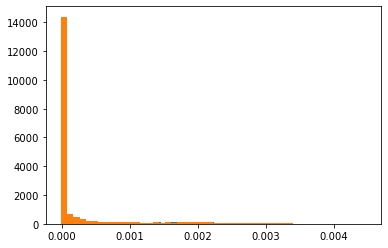

In [ ]:
plt.hist(f['1000000']['lyapunov_x'][:], bins=50);
plt.hist(f['1000000']['lyapunov_b_x'][:], bins=50);

In [ ]:
idx = np.nanargmax(f['10000']['lyapunov_b_x'][:])
time = []
data_1 = []
data_2 = []

for key in f:
    if not key.isdigit():
        continue
    time.append(int(key))
    data_1.append(f[key]['lyapunov_x'][idx])
    data_2.append(f[key]['lyapunov_b_x'][idx])

time = np.array(time)
data_1 = np.array(data_1)
data_2 = np.array(data_2)

sort_idx = np.argsort(time)
time = time[sort_idx]
data_1 = data_1[sort_idx]
data_2 = data_2[sort_idx]

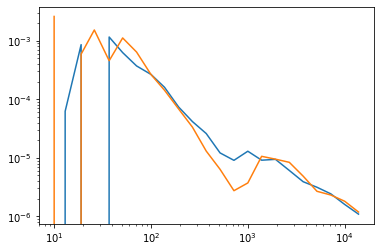

In [ ]:
plt.plot(time, data_1/time, label='lyapunov_x')
plt.plot(time, data_2/time, label='lyapunov_b_x')
plt.xscale("log")
plt.yscale("log")

In [ ]:
f['1000000']['lyapunov_b_x'][np.nanargmin(f['1000000']['lyapunov_b_x'][:])]

-5.44311586496637e-06